Part 2 Data Wrangling

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import patsy
import statsmodels.api as sm
import os
from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)
from IPython.core.display import HTML

def multi_table(table_list):
    ''' Acceps a list of IpyTable objects and returns a table which contains each IpyTable in a cell
    '''
    return HTML(
        '<table><tr style="background-color:white;">' + 
        ''.join(['<td>' + table._repr_html_() + '</td>' for table in table_list]) +
        '</tr></table>'
    )

In [3]:
# Read in our file of data
df = pd.read_csv("2012-18_officialBoxScore.csv")

In [4]:
# Break up data frame to just the dates, team result, team free throws
DateRsltFta = df[['gmDate', 'teamRslt', 'teamFTA', 'opptFTA']]

wins = DateRsltFta[DateRsltFta['teamRslt'] == 'Win']
loss = DateRsltFta[DateRsltFta['teamRslt'] == 'Loss']

# Break up dataframes for each season
mask1213 = (DateRsltFta['gmDate'] >= '2012-10-30') & (DateRsltFta['gmDate'] <= '2013-04-17')
season1213 = DateRsltFta.loc[mask1213]

mask1314 = (DateRsltFta['gmDate'] >= '2013-10-29') & (DateRsltFta['gmDate'] <= '2014-04-16')
season1314 = DateRsltFta.loc[mask1314]

mask1415 = (DateRsltFta['gmDate'] >= '2014-10-28') & (DateRsltFta['gmDate'] <= '2015-04-15')
season1415 = DateRsltFta.loc[mask1415]

mask1516 = (DateRsltFta['gmDate'] >= '2015-10-27') & (DateRsltFta['gmDate'] <= '2016-04-13')
season1516 = DateRsltFta.loc[mask1516]

mask1617 = (DateRsltFta['gmDate'] >= '2016-10-25') & (DateRsltFta['gmDate'] <= '2017-04-12')
season1617 = DateRsltFta.loc[mask1617]

mask1718 = (DateRsltFta['gmDate'] >= '2017-10-17') & (DateRsltFta['gmDate'] <= '2018-04-11')
season1718 = DateRsltFta.loc[mask1718]



In [5]:
# Break up data frame to see which team shot more free throws

# Season 2012-2013
moreFTA1213 = season1213[season1213['teamFTA'] > season1213['opptFTA']]
moreFTA1213.drop_duplicates( keep='first',inplace=True) 
sumMoreFTA1213Win = sum(moreFTA1213['teamRslt'] == 'Win')
sumMoreFTA1213Loss = sum(moreFTA1213['teamRslt'] == 'Loss')

# Season 2013-2014
moreFTA1314 = season1314[season1314['teamFTA'] > season1314['opptFTA']]
moreFTA1314.drop_duplicates( keep='first',inplace=True) 
sumMoreFTA1314Win = sum(moreFTA1314['teamRslt'] == 'Win')
sumMoreFTA1314Loss = sum(moreFTA1314['teamRslt'] == 'Loss')

# Season 2014-2015
moreFTA1415 = season1415[season1415['teamFTA'] > season1415['opptFTA']]
moreFTA1415.drop_duplicates( keep='first',inplace=True) 
sumMoreFTA1415Win = sum(moreFTA1415['teamRslt'] == 'Win')
sumMoreFTA1415Loss = sum(moreFTA1415['teamRslt'] == 'Loss')

# Season 2015-2016
moreFTA1516 = season1516[season1516['teamFTA'] > season1516['opptFTA']]
moreFTA1516.drop_duplicates( keep='first',inplace=True) 
sumMoreFTA1516Win = sum(moreFTA1516['teamRslt'] == 'Win')
sumMoreFTA1516Loss = sum(moreFTA1516['teamRslt'] == 'Loss')

# Season 2016-2017
moreFTA1617 = season1617[season1617['teamFTA'] > season1617['opptFTA']]
moreFTA1617.drop_duplicates( keep='first',inplace=True)
sumMoreFTA1617Win = sum(moreFTA1617['teamRslt'] == 'Win')
sumMoreFTA1617Loss = sum(moreFTA1617['teamRslt'] == 'Loss')

# Season 2017-2018
moreFTA1718 = season1718[season1718['teamFTA'] > season1718['opptFTA']]
moreFTA1718.drop_duplicates( keep='first',inplace=True) 
sumMoreFTA1718Win = sum(moreFTA1718['teamRslt'] == 'Win')
sumMoreFTA1718Loss = sum(moreFTA1718['teamRslt'] == 'Loss')


C:\Users\zhaoy\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\zhaoy\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\zhaoy\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\zhaoy\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarn

In [6]:
# NBA Team Ranings 2012 - 2018

rank1 = pd.read_csv('12-13_Standing.csv')
rank1 = rank1.sort_values(by=['RANK'], ascending=True)

rank2 = pd.read_csv('13-14_Standing.csv')
rank2 = rank2.sort_values(by=['RANK'], ascending=True)

rank3 = pd.read_csv('14-15_Standing.csv')
rank3 = rank3.sort_values(by=['RANK'], ascending=True)

rank4 = pd.read_csv('15-16_Standing.csv')
rank4 = rank4.sort_values(by=['RANK'], ascending=True)

rank5 = pd.read_csv('16-17_Standing.csv')
rank5 = rank5.sort_values(by=['RANK'], ascending=True)

rank6 = pd.read_csv('17-18_Standing.csv')
rank6 = rank6.sort_values(by=['RANK'], ascending=True)


In [7]:
# Drop one of the duplicate column for each season

rank11 = rank1.drop(['RANKORD'], axis = 1)
rank22 = rank2.drop(['RANKORD'], axis = 1)
rank33 = rank3.drop(['RANKORD'], axis = 1)
rank44 = rank4.drop(['RANKORD'], axis = 1)
rank55 = rank5.drop(['RANKORD'], axis = 1)
rank66 = rank6.drop(['RANKORD'], axis = 1)


In [8]:
# display data table 2012 - 13, 2013 - 14
display_side_by_side(rank11, rank22)

,SEASON,TEAM,RANK,WIN,LOST
20,2012-13,OKC,1,60,22
15,2012-13,MIA,1,66,16
25,2012-13,SA,2,58,24
19,2012-13,NY,2,54,28
7,2012-13,DEN,3,57,25
11,2012-13,IND,3,49,32
14,2012-13,MEM,4,56,26
1,2012-13,BKN,4,49,33
12,2012-13,LAC,4,56,26
4,2012-13,CHI,5,45,37


In [9]:
# display data table 2014 - 15, 2015 - 16
display_side_by_side(rank33, rank44)

,SEASON,TEAM,RANK,WIN,LOST
0,2014-15,ATL,1,60,22
9,2014-15,GS,1,67,15
12,2014-15,LAC,2,56,26
5,2014-15,CLE,2,53,29
10,2014-15,HOU,2,56,26
4,2014-15,CHI,3,50,32
27,2014-15,TOR,4,49,33
25,2014-15,SA,4,55,27
14,2014-15,MEM,4,55,27
29,2014-15,WAS,5,46,36


In [10]:
# display data table 2016 - 17, 2017 - 18
display_side_by_side(rank55, rank66)

,SEASON,TEAM,RANK,WIN,LOST
2,2016-2017,BOS,1,53,29
9,2016-2017,GS,1,67,15
27,2016-2017,TOR,2,51,31
25,2016-2017,SA,2,61,21
5,2016-2017,CLE,2,51,31
10,2016-2017,HOU,3,55,27
29,2016-2017,WAS,4,49,33
28,2016-2017,UTA,4,51,31
12,2016-2017,LAC,4,51,31
0,2016-2017,ATL,5,43,39


In [11]:
# Inserting new data

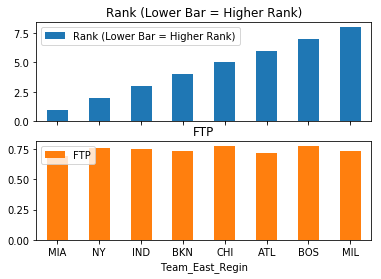

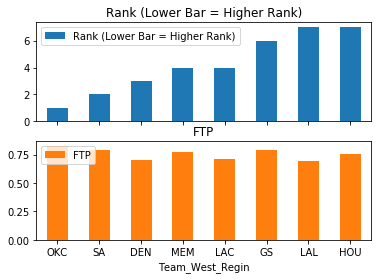

In [52]:
# read data from new csv file fpr record of 2012-2013 Season
nbaResult1213 = pd.read_csv('nbaResult1213.csv')
FTP1213 = nbaResult1213.iloc[[2, 5, 3, 10, 0, 24, 26, 16, 8, 28, 13, 6, 5, 19, 1, 11], [15]]

# cut off teams which did not make to playoff
playoffTeamTemp1213 = rank1[:-14]

# reset the indexes
FTP1213.reset_index(drop=True, inplace=True)
playoffTeamTemp1213.reset_index(drop=True, inplace=True)

# concatnate the data and set column names
playoffTeam = pd.concat([playoffTeamTemp1213, FTP1213], axis=1, ignore_index=True)
playoffTeam.columns = ['Year', 'Team', 'Rank', 'RankOD', 'Win', 'Lost', 'FTP']

# extract the team record for east and west regin
playoff1213East = playoffTeam.iloc[[1,3,5,7,9,10,13,15], [1,2,6]]
playoff1213West = playoffTeam.iloc[[0,2,4,6,8,11,12,14], [1,2,6]]

# change the column names for different regin
playoff1213East.rename(columns={'Team':'Team_East_Regin'}, inplace=True)
playoff1213East.rename(columns={'Rank':'Rank (Lower Bar = Higher Rank)'}, inplace=True)
playoff1213West.rename(columns={'Team':'Team_West_Regin'}, inplace=True)
playoff1213West.rename(columns={'Rank':'Rank (Lower Bar = Higher Rank)'}, inplace=True)

# set 'Team' as index
playoff1213East = playoff1213East.set_index('Team_East_Regin')
playoff1213West = playoff1213West.set_index('Team_West_Regin')

# sort the data by rank
playoff1213East = playoff1213East.sort_values(by=['Rank (Lower Bar = Higher Rank)'], ascending=True)
playoff1213West = playoff1213West.sort_values(by=['Rank (Lower Bar = Higher Rank)'], ascending=True)

# plot the graph
ax1 = playoff1213East.plot.bar(rot=0, subplots=True)
ax1[1].legend(loc=2)
ax2 = playoff1213West.plot.bar(rot=0, subplots=True)
ax2[1].legend(loc=2)

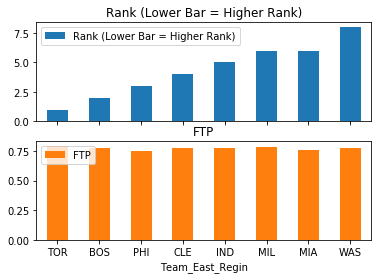

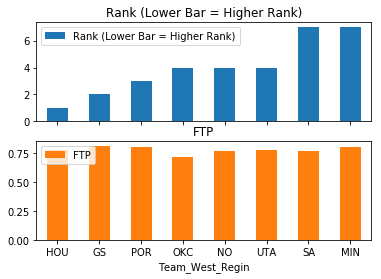

In [49]:
#FTP1718 = [79.4, 78.1, 77.1, 81.5, 75.2, 80.0, 71.6, 77.9, 77.2, 77.9, 77.9, 78.3, 75.5, 77.2, 80.4, 77.2]

# read data from new csv file fpr record of 2012-2013 Season
nbaResult1718 = pd.read_csv('nbaResult1718.csv')
FTP1718 = nbaResult1718.iloc[[3, 1, 19, 0, 6, 15, 11, 4, 13, 16, 4, 14, 22, 2, 7, 12], [15]]

# cut off teams which did not make to playoff
playoffTeamTemp1718 = rank6[:-14]

# reset the indexes
FTP1718.reset_index(drop=True, inplace=True)
playoffTeamTemp1718.reset_index(drop=True, inplace=True)

# concatnate the data and set column names
playoffTeam1718 = pd.concat([playoffTeamTemp1718, FTP1718], axis=1, ignore_index=True)
playoffTeam1718.columns = ['Year', 'Team', 'Rank', 'RankOD', 'Win', 'Lost', 'FTP']

# extract the team record for east and west regin
playoff1718West = playoffTeam1718.iloc[[1,3,5,6,8,9,13,14], [1,2,6]]
playoff1718East = playoffTeam1718.iloc[[0,2,4,7,10,11,12,15], [1,2,6]]

# change the column names for different regin
playoff1718East.rename(columns={'Team':'Team_East_Regin'}, inplace=True)
playoff1718East.rename(columns={'Rank':'Rank (Lower Bar = Higher Rank)'}, inplace=True)
playoff1718West.rename(columns={'Team':'Team_West_Regin'}, inplace=True)
playoff1718West.rename(columns={'Rank':'Rank (Lower Bar = Higher Rank)'}, inplace=True)

# set 'Team' as index
playoff1718East = playoff1718East.set_index('Team_East_Regin')
playoff1718West = playoff1718West.set_index('Team_West_Regin')

# sort the data by rank
playoff1718East = playoff1718East.sort_values(by=['Rank (Lower Bar = Higher Rank)'], ascending=True)

playoff1718West = playoff1718West.sort_values(by=['Rank (Lower Bar = Higher Rank)'], ascending=True)


# plot the graph
ax3 = playoff1718East.plot.bar(rot=0, subplots=True)
ax3[1].legend(loc=2)
ax4 = playoff1718West.plot.bar(rot=0, subplots=True)
ax4[1].legend(loc=2)